# Part 1 + Part 2 : Location based Objects, All Translations  

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import distance
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
import statistics as st
import matplotlib.gridspec as gridspec
from scipy.stats import shapiro
from matplotlib import pyplot
from scipy.stats import norm
import seaborn as sns
import nbimporter
from calculate_3D import aggregate_results
from calculate_3D import read_results_file
from calculate_3D import get_elaborate_data
from plot import plot_with_broken_axis
from plot import plot_without_broken_axis

In [12]:
base2='../../../Plots/Language_Plots/During_Study/3D/'

In [13]:
results_file = '../../../Data/Survey_Data/Reminessence_Responses_Organization.xlsx' #first 32 users

results = read_results_file(results_file)
# print(results)

/Users/nirmita/Downloads/Data_Analysis_test2/Analysis/Language_Analysis/During_Study/calculate_3D.py:158: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  row = [str(x.iloc[0]).lower() for no,x in (df[(df[2]==i) & (df[3]==survey[j])].iloc[:,11:51]).iteritems()]


In [14]:
scores = aggregate_results(results)
df = pd.DataFrame(scores, columns = ['User','Gender', 'Survey', 'Order', 'Type', 'Condition', 'Score_O', 'Score_T'])

    User   Gender   Survey    Order     Type Condition  Score O  Score T
       0        M        0        1        0  control       10       10
       0        M        1        1        1  control       10       10
       0        M        2        1        0    scent       10       10
       0        M        3        1        1    scent       10       10
       1        M        0        1        0  control        5        4
       1        M        1        1        1  control        7        6
       1        M        2        1        0    scent       10        7
       1        M        3        1        1    scent       10        9
       2        M        0        1        0  control        4        6
       2        M        1        1        1  control        3        6
       2        M        2        1        0    scent       10        6
       2        M        3        1        1    scent       10        7
       3        F        0        1        0  control        6 

In [15]:
df2 = get_elaborate_data()

# Total Score of object and translation (Post, Pre)

In [16]:
total_control = df[df.Condition == 'control']['Score_O'].sum()
total_scent = df[df.Condition == 'scent']['Score_O'].sum()
print("Total Object Recall:")
print("\tControl: {}, Scent: {} \n".format(total_control, total_scent))


#Survey 2 and 4 - Post Recall for scent & odor
# Compare Survey 2 (1 in python) and Survey 4 (3 in python)
total_control_postsleep = df[df.Survey == 1]['Score_O'].sum()
total_scent_postsleep = df[df.Survey == 3]['Score_O'].sum()
print("Post-Sleep Object Recall:")
print("\tControl: {}, Scent: {}\n".format(total_control_postsleep, total_scent_postsleep))

#Survey 1 and 3 - Pre Recall for scent & odor
total_control_presleep = df[df.Survey == 0]['Score_O'].sum()
total_scent_presleep = df[df.Survey == 2]['Score_O'].sum()
print("Pre-Sleep Object Recall:")
print("\tControl: {}, Scent: {}".format(total_control_presleep, total_scent_presleep))

Total Object Recall:
	Control: 557, Scent: 601 

Post-Sleep Object Recall:
	Control: 280, Scent: 306

Pre-Sleep Object Recall:
	Control: 277, Scent: 295


In [17]:
total_control_translation = df[df.Condition == 'control']['Score_T'].sum()
total_scent_translation = df[df.Condition == 'scent']['Score_T'].sum()
print("Total Translation Recall:")
print("\tControl: {}, Scent: {} \n".format(total_control_translation, total_scent_translation))


#Survey 2 and 4 - Post Recall for scent & odor
# Compare Survey 2 (1 in python) and Survey 4 (3 in python)
total_control_postsleep_translation = df[df.Survey == 1]['Score_T'].sum()
total_scent_postsleep_translation = df[df.Survey == 3]['Score_T'].sum()
print("Post-Sleep Translation Recall:")
print("\tControl: {}, Scent: {}\n".format(total_control_postsleep_translation, total_scent_postsleep_translation))

#Survey 1 and 3 - Pre Recall for scent & odor
total_control_presleep_translation = df[df.Survey == 0]['Score_T'].sum()
total_scent_presleep_translation = df[df.Survey == 2]['Score_T'].sum()
print("Pre-Sleep Translation Recall:")
print("\tControl: {}, Scent: {}".format(total_control_presleep_translation, total_scent_presleep_translation))

Total Translation Recall:
	Control: 500, Scent: 528 

Post-Sleep Translation Recall:
	Control: 255, Scent: 274

Pre-Sleep Translation Recall:
	Control: 245, Scent: 254


# Outliers

In [18]:
# Removing outliers from the object scores - removed only 1 outlier
elements = df['Score_O']
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)
print(mean,sd)
final_list = []
counter =0
for x in elements:
    
    if (x > mean - 2 * sd) and (x < mean + 2 * sd):
        final_list.append(x)
    else:
        print(x,counter)
    counter+=1
    
print(len(np.asarray(elements)))
print(len(final_list))

df_o=df.drop([24,25,26,27]) # data frame after removing outliers from object scores
# df_o=df.drop([8,9,10,11,16,17,18,19,32,33,34,35,116,117,118,119])

9.046875 1.6949344336507532
5 4
4 8
3 9
4 17
0 24
5 64
128
122


In [19]:
# Removing outliers from the object scores - removed no outlier
elements = df['Score_T']
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)
print(mean,sd)
final_list = []
counter =0
for x in elements:
    
    if (x > mean - 2 * sd) and (x < mean + 2 * sd):
        final_list.append(x)
    else:
        print(x,counter)
    counter+=1
    
print(len(np.asarray(elements)))
print(len(final_list))

df_t=df # data frame after removing outliers from translation scores
# df_t=df.drop([32,33,34,35,48,49,50,51])

8.03125 2.0613159480050602
1 24
3 26
3 44
2 45
3 81
128
123


# Anova after removing outliers

In [24]:
# repeated measures mixed anova for translation score - calculating within the condition and type
pg.rm_anova(data=df_t, dv='Score_T', within=['Condition','Type'], subject='User', correction = True, detailed=True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition,6.12500,1,31,6.12500,3.225053,0.082273,0.082273,0.011426,1.0
1,Type,7.03125,1,31,7.03125,9.489796,0.004307,0.004307,0.013094,1.0
2,Condition * Type,0.78125,1,31,0.78125,1.591376,0.216540,0.216540,0.001472,1.0


In [25]:
# repeated measures mixed anova for object score - calculating within the condition and type
pg.rm_anova(data=df_o, dv='Score_O', within=['Condition','Type'], subject='User', correction = True, detailed=True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition,11.645161,1,30,11.645161,3.015453,0.092735,0.092735,0.042747,1.0
1,Type,0.290323,1,30,0.290323,0.392157,0.535904,0.535904,0.001112,1.0
2,Condition * Type,2.064516,1,30,2.064516,2.889391,0.099512,0.099512,0.007855,1.0


# PLOTS

In [34]:
wake_control_object=df2[(df2.Type==0) & (df2.Condition == "control")]['Score_O']
sleep_control_object=df2[(df2.Type==1) & (df2.Condition == "control")]['Score_O']
wake_scent_object=df2[(df2.Type==0) & (df2.Condition == "scent")]['Score_O']
sleep_scent_object=df2[(df2.Type==1) & (df2.Condition == "scent")]['Score_O']

wake_control_trans=df2[(df2.Type==0) & (df2.Condition == "control")]['Score_T']
sleep_control_trans=df2[(df2.Type==1) & (df2.Condition == "control")]['Score_T']
wake_scent_trans=df2[(df2.Type==0) & (df2.Condition == "scent")]['Score_T']
sleep_scent_trans=df2[(df2.Type==1) & (df2.Condition == "scent")]['Score_T']

## Object Pre-sleep Memorization (Control vs Scent)

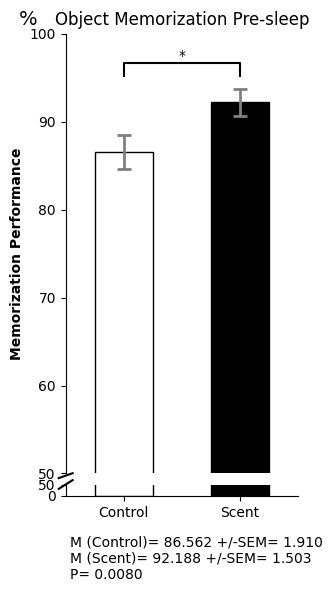

In [35]:
plot_with_broken_axis('Object Memorization Pre-sleep','3D/Object_wake', 'Control', 'Scent','white','black','Memorization Performance',wake_control_object,wake_scent_object,[50,100],12)

## Object Post-Sleep Memorization (Control vs Scent) 

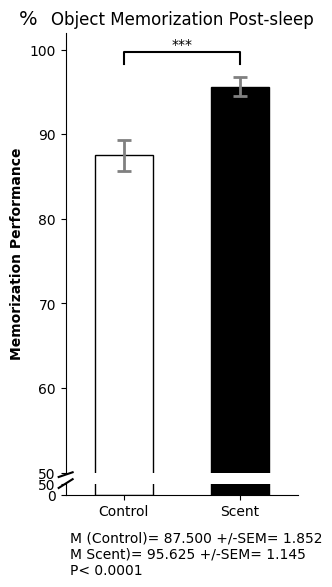

In [36]:
plot_with_broken_axis('Object Memorization Post-sleep','3D/Object_sleep', 'Control', 'Scent','white','black','Memorization Performance',sleep_control_object,sleep_scent_object,[50,102],12)

## Translation Pre-sleep Memorization (Control vs Scent)

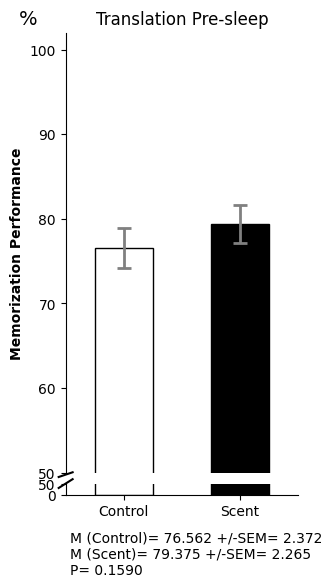

In [37]:
plot_with_broken_axis('Translation Pre-sleep','3D/Translation_wake', 'Control', 'Scent','white','black','Memorization Performance',wake_control_trans,wake_scent_trans,[50,102],12)

## Translation Sleep Memorization (Control vs Scent)

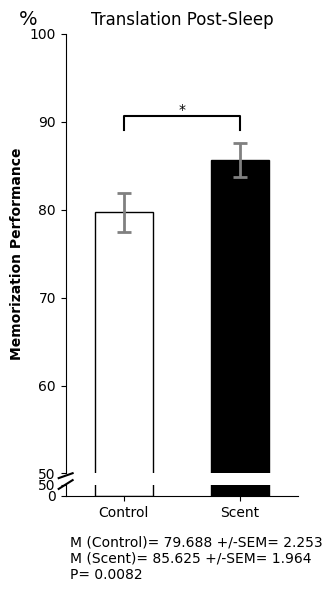

In [38]:
plot_with_broken_axis('Translation Post-Sleep','3D/Translation_sleep', 'Control', 'Scent','white','black','Memorization Performance', sleep_control_trans, sleep_scent_trans,[50,100],12)